In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfshop= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv')

In [ ]:
dfshop.describe(include='all')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


Histogram

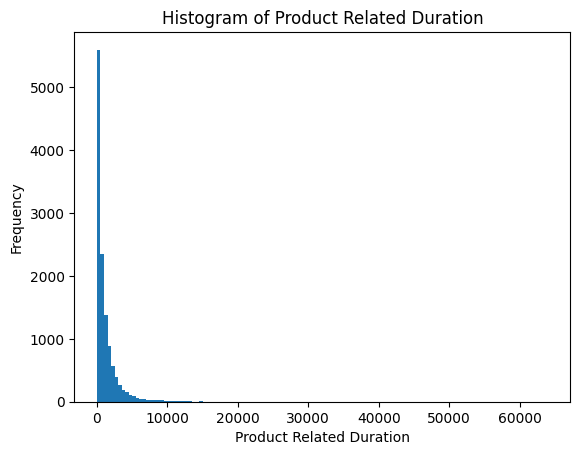

In [ ]:
y = dfshop.loc[:,'ProductRelated_Duration']

binwidth = 500.0
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Product Related Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Product Related Duration')
plt.show()

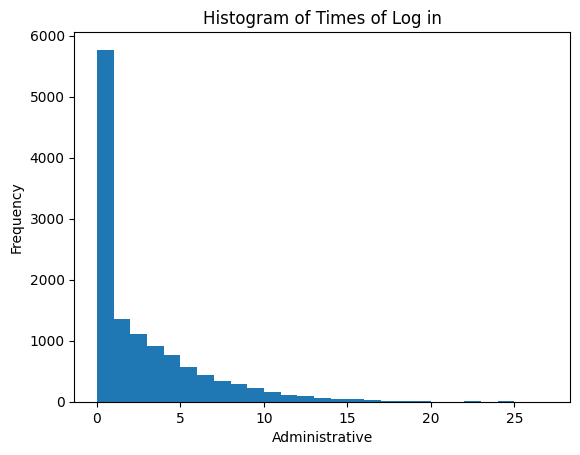

In [ ]:
# Set data fields
y = dfshop.loc[:,'Administrative']

# Set histogram parameters
binwidth = 1.0
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Administrative')
plt.ylabel('Frequency')
plt.title('Histogram of Times of Log in')
plt.show()

In [ ]:
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
dfshop['Month'] = dfshop['Month'].map(month_mapping)


In [ ]:

if dfshop['Month'].isnull().any():
    print("Conversion failed for some entries in 'Month'.")


In [ ]:
label_encoder = LabelEncoder()
dfshop['VisitorType'] = label_encoder.fit_transform(dfshop['VisitorType'])


In [ ]:
dfshop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,False


<Figure size 2000x1500 with 0 Axes>

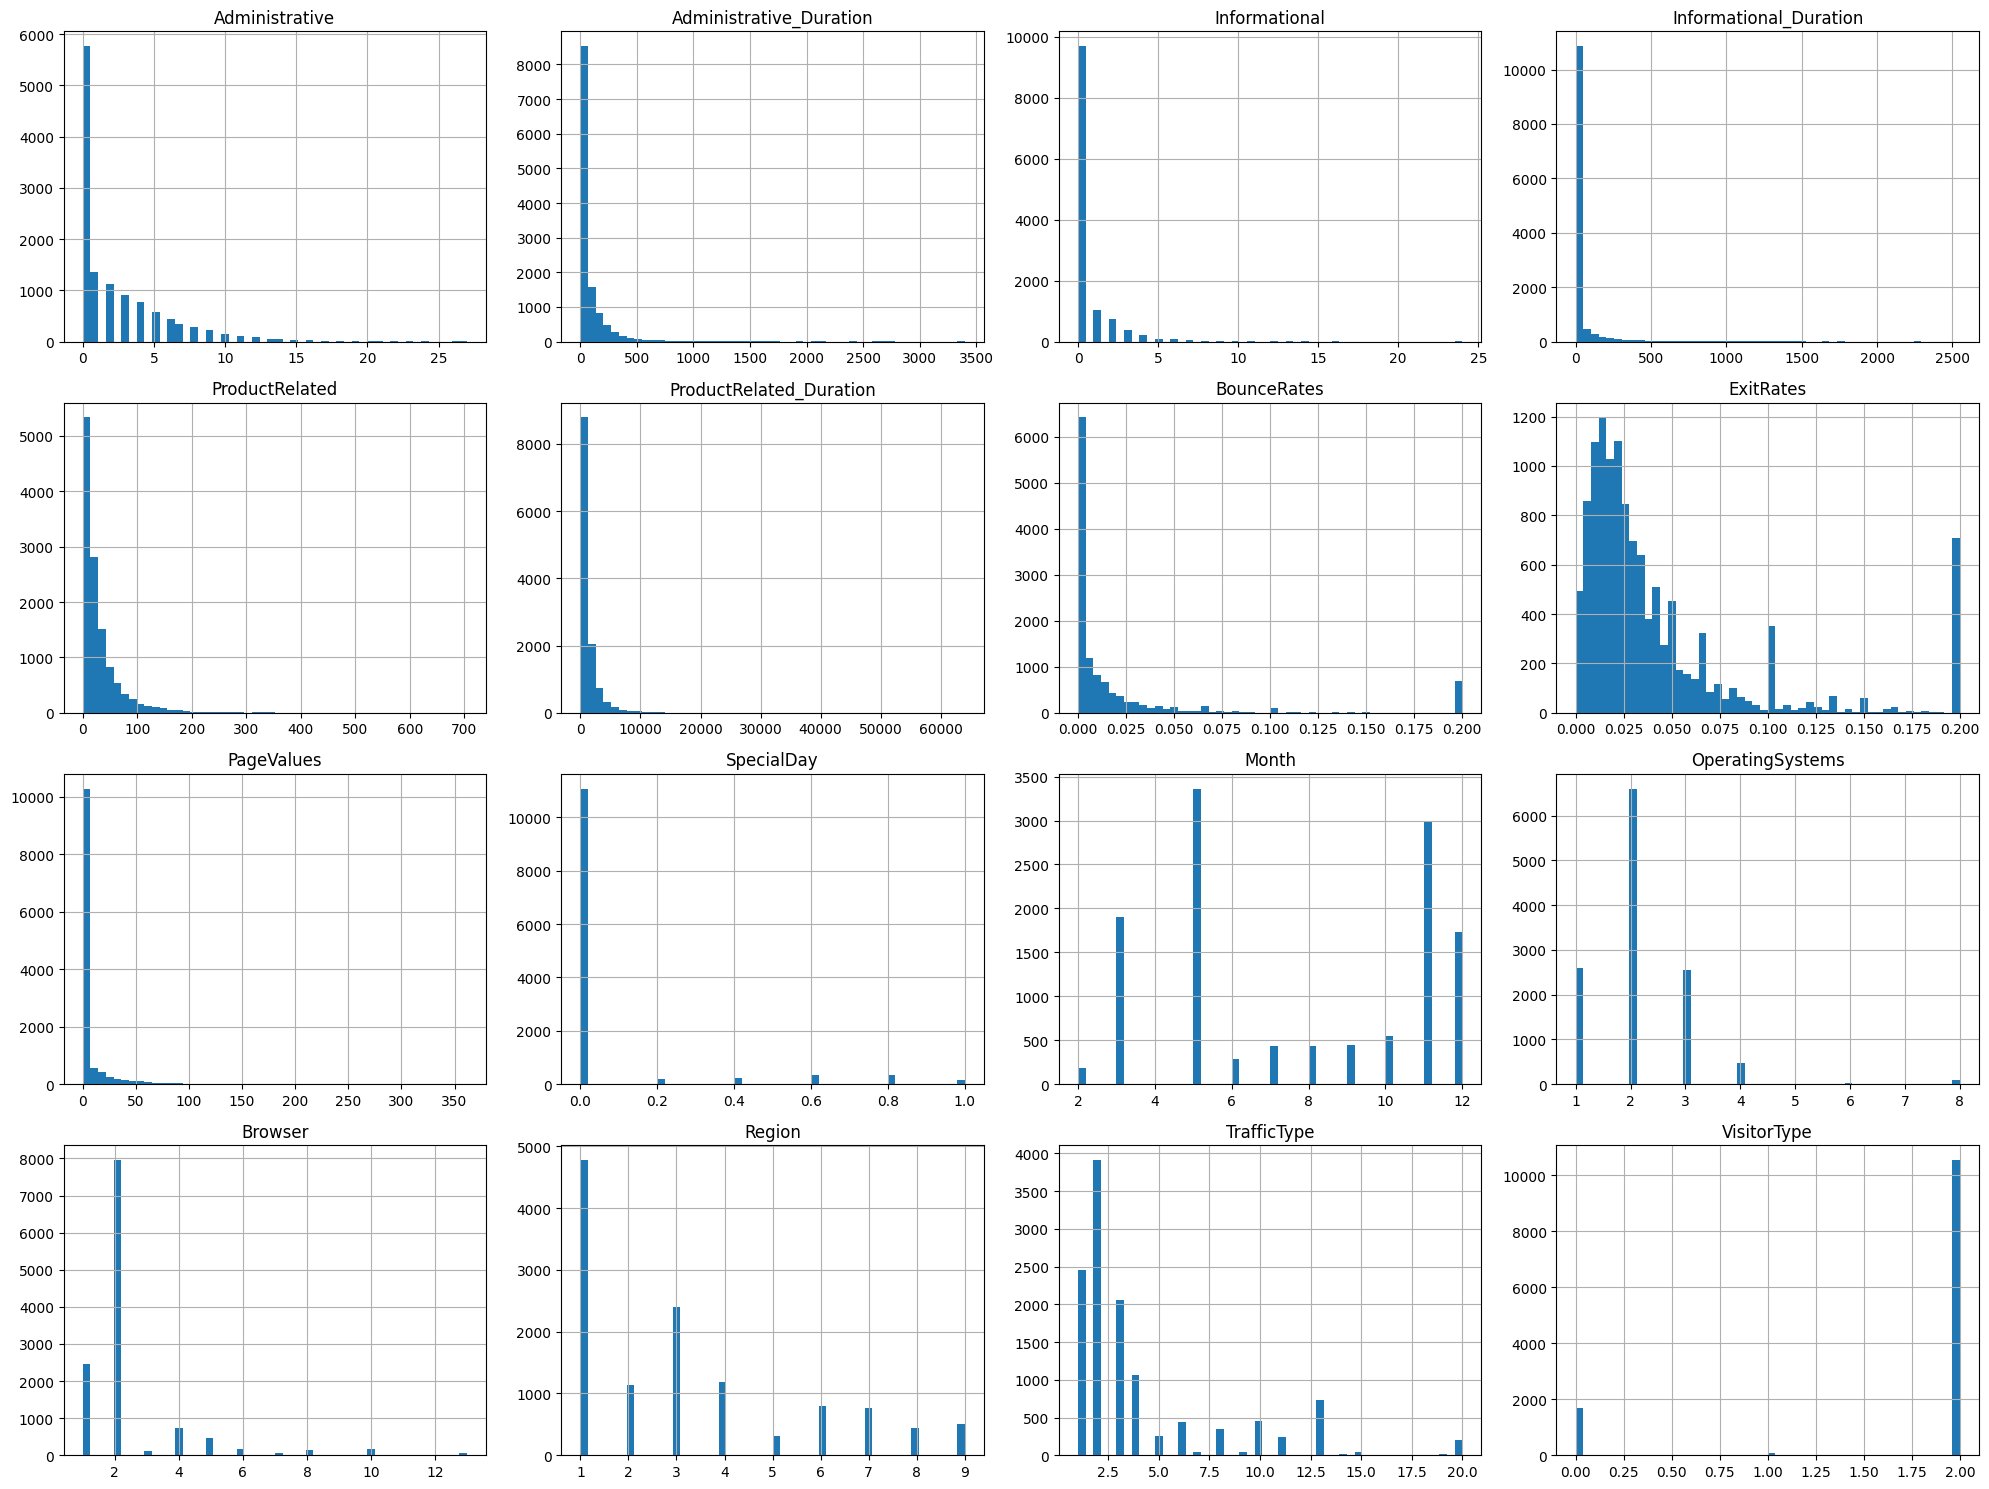

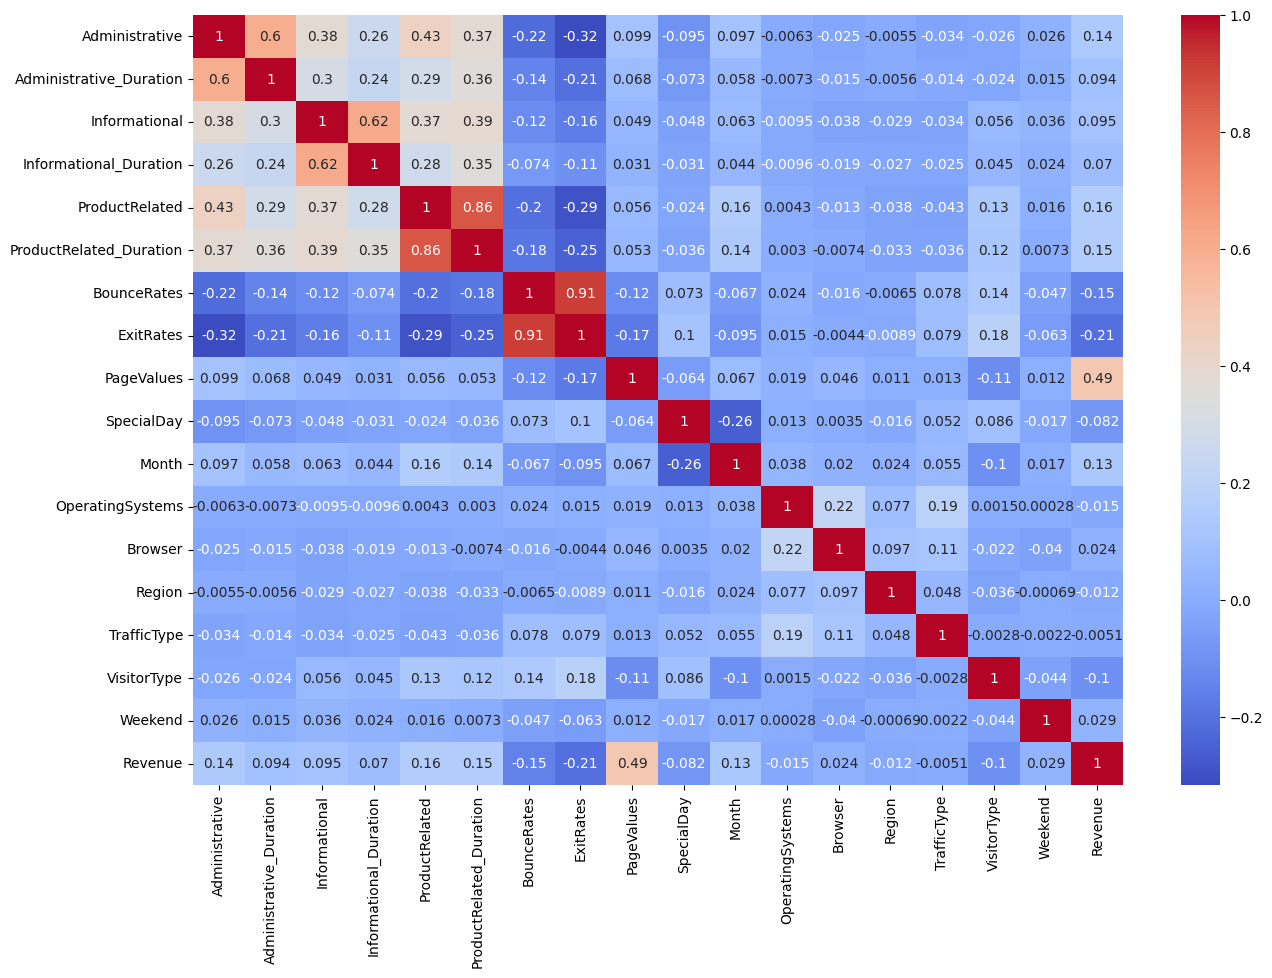

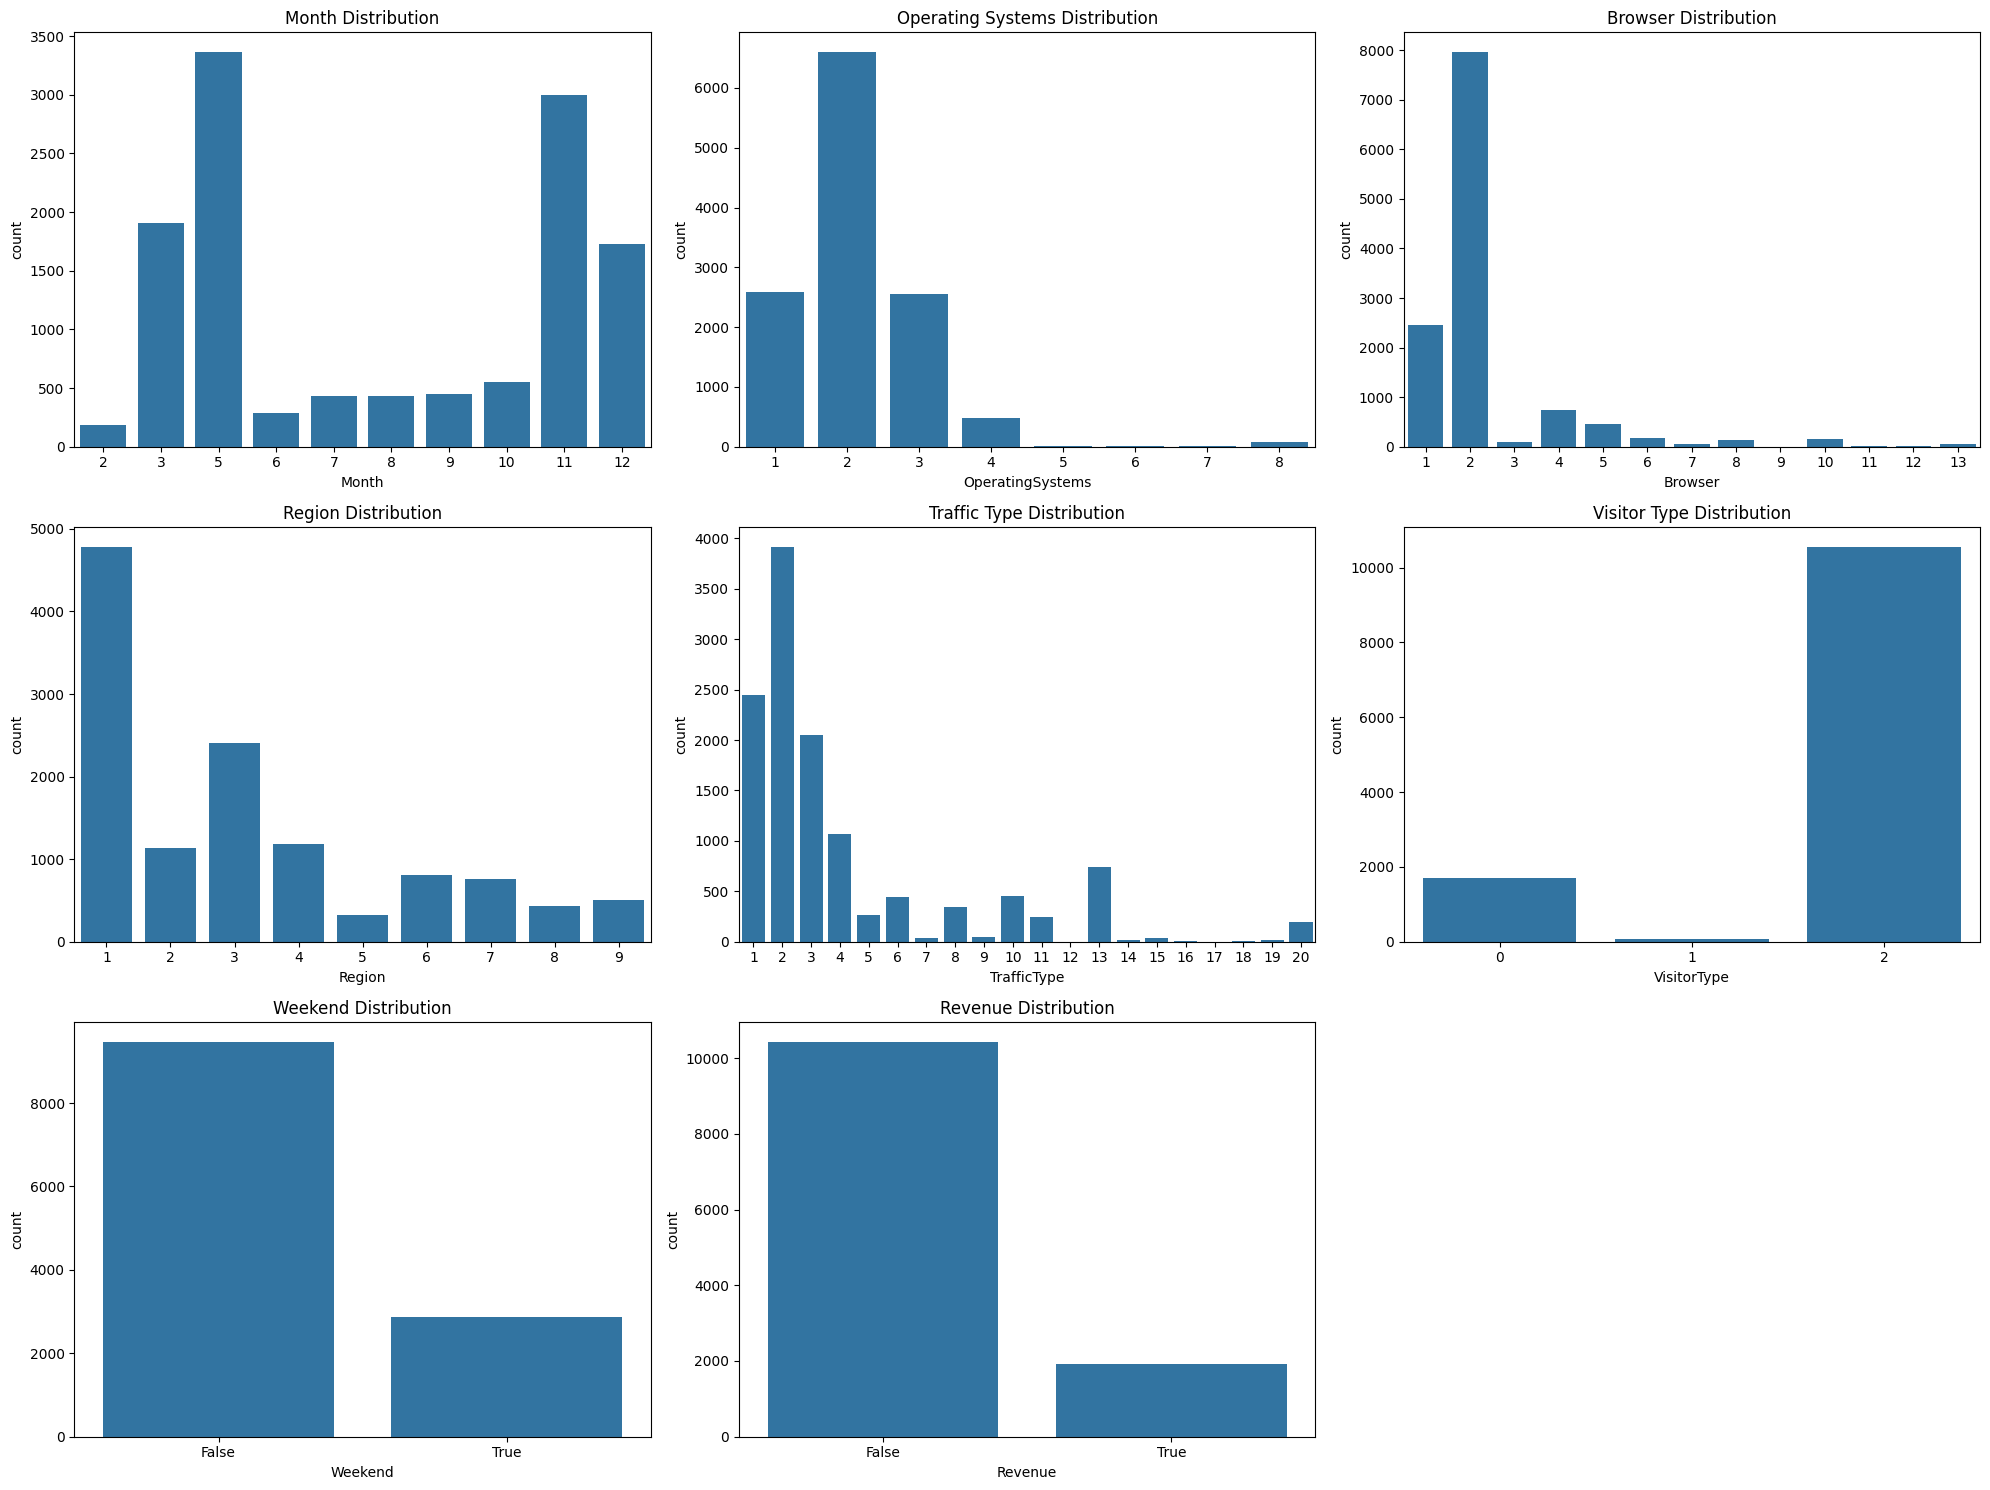

In [ ]:
plt.figure(figsize=(20, 15))
dfshop.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Identify correlations between variables
correlation_matrix = dfshop.corr( )
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
# Additional EDA: Distribution of categorical variables
plt.figure(figsize=(20, 15))

# Month
plt.subplot(3, 3, 1)
sns.countplot(x='Month', data=dfshop)
plt.title('Month Distribution')

# OperatingSystems
plt.subplot(3, 3, 2)
sns.countplot(x='OperatingSystems', data=dfshop)
plt.title('Operating Systems Distribution')

# Browser
plt.subplot(3, 3, 3)
sns.countplot(x='Browser', data=dfshop)
plt.title('Browser Distribution')

# Region
plt.subplot(3, 3, 4)
sns.countplot(x='Region', data=dfshop)
plt.title('Region Distribution')

# TrafficType
plt.subplot(3, 3, 5)
sns.countplot(x='TrafficType', data=dfshop)
plt.title('Traffic Type Distribution')

# VisitorType
plt.subplot(3, 3, 6)
sns.countplot(x='VisitorType', data=dfshop)
plt.title('Visitor Type Distribution')

# Weekend
plt.subplot(3, 3, 7)
sns.countplot(x='Weekend', data=dfshop)
plt.title('Weekend Distribution')

# Revenue
plt.subplot(3, 3, 8)
sns.countplot(x='Revenue', data=dfshop)
plt.title('Revenue Distribution')

plt.tight_layout()
plt.show()

#First Part of Histograms
Commenting about the graphs that has been given:
1st part:I examined the relations of frequency depending on different features as shown in the figure. Many of the graphs demonstrate an exponential relations (skewed to the lower values)except for months, exit rates, visitor type, operating system and traffic type. The reason those graphs not being exponential can be taking discrete values as in visitor type which takes [0,2] depending on the new or returning customer. Returning Visitors are more than new visitors it indicates that there is a good retention rate.


Browser usage is densed in a specific one, others are very low in usage compared to the 2nd browser.

Traffic Type there are many peak categories. Some sources drive more traffic than others. It is important to invest on them.


Months also has a different distribution, there are around 4-5 peak months that has high rates. If we had the data over the years we could made comment about seasonality but not in this case.

Page Values: most of the data is 0. They don't contribute directly to e-commerce transactions.

Special days: most of the visits to the page occur non-special days. Special day visitings are very low.


Durations: quick visits, short durations are observed in the data.

#Correlation Matrix
Bounce Rates and Exit Rates are highly correlated, correlation rate is 0.91

Product Related and Product Related Durations shows a strong correlation as well.

On the other hand there are some negative corelations as well. They are not so strong but still noticeable. BounceRates and Page Values (-0.12)

Administrative and Exit Rates shows a negative relations as -0.32

Special dates are negatively correlated with many attributes because people login less, shop less, spent less time on the websites.

Lastly there are some very weak correlations as well. Such as Region and operating system has 0.077 correlation.

#Last graphs

These histograms demonstrate different attributes and their frequency patterns

**Month** distribution demonstrates that peak months are November and May.

**Region Distributions** users are concentrated on some regions, you can use this data for the advertisement works.

**Browser Distribution** there are popular browsers which are highly used when compared to other ones.

**Visitor Type** the previous customers are coming back, and they make up the majority.

**Weekend Distribution** most of the visits occur on weekdays.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
dfshop['Weekend'] = label_encoder.fit_transform(dfshop['Weekend'])


In [ ]:
dfshop = dfshop.dropna()

# Define features and target variable
X = dfshop.drop('Revenue', axis=1)
y = dfshop['Revenue']

In [ ]:
# Create interaction features
X['Admin_Product'] = X['Administrative'] * X['ProductRelated']
X['Info_Product'] = X['Informational'] * X['ProductRelated']
X['Admin_Info'] = X['Administrative'] * X['Informational']


In [ ]:
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                      'Admin_Product', 'Info_Product', 'Admin_Info']


In [ ]:

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [ ]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

In [ ]:
models = {
    'Logistic Regression': (LogisticRegression(max_iter=500), {'C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}),
    'Support Vector Machine': (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})
}

best_models = {}



Training Logistic Regression...
Logistic Regression Cross-Validation Accuracy: 0.8825 ± 0.0040
Logistic Regression Performance:
Accuracy: 0.8816
Precision: 0.7605
Recall: 0.3478
F1-score: 0.4773
ROC-AUC: 0.8857
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3124
        True       0.76      0.35      0.48       575

    accuracy                           0.88      3699
   macro avg       0.83      0.66      0.71      3699
weighted avg       0.87      0.88      0.86      3699



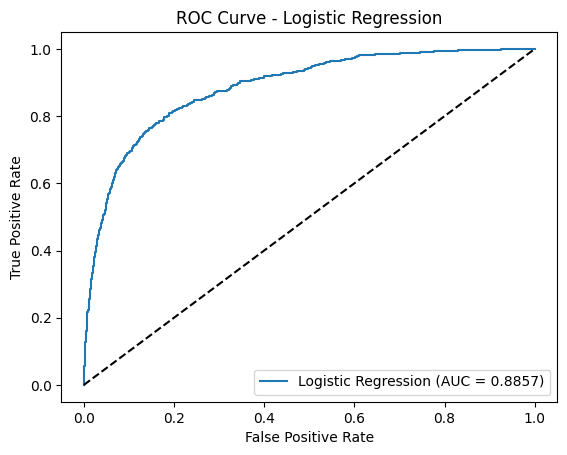

Training Decision Tree...
Decision Tree Cross-Validation Accuracy: 0.8846 ± 0.0035
Decision Tree Performance:
Accuracy: 0.8778
Precision: 0.6171
Recall: 0.5635
F1-score: 0.5891
ROC-AUC: 0.8356
              precision    recall  f1-score   support

       False       0.92      0.94      0.93      3124
        True       0.62      0.56      0.59       575

    accuracy                           0.88      3699
   macro avg       0.77      0.75      0.76      3699
weighted avg       0.87      0.88      0.88      3699



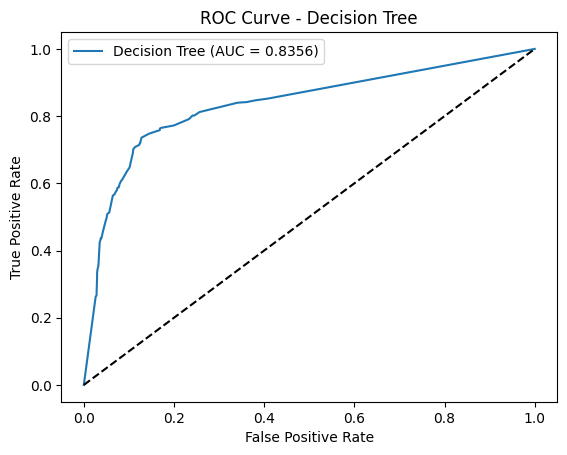

Training Random Forest...
Random Forest Cross-Validation Accuracy: 0.9037 ± 0.0026
Random Forest Performance:
Accuracy: 0.8938
Precision: 0.7209
Recall: 0.5165
F1-score: 0.6018
ROC-AUC: 0.9243
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3124
        True       0.72      0.52      0.60       575

    accuracy                           0.89      3699
   macro avg       0.82      0.74      0.77      3699
weighted avg       0.89      0.89      0.89      3699



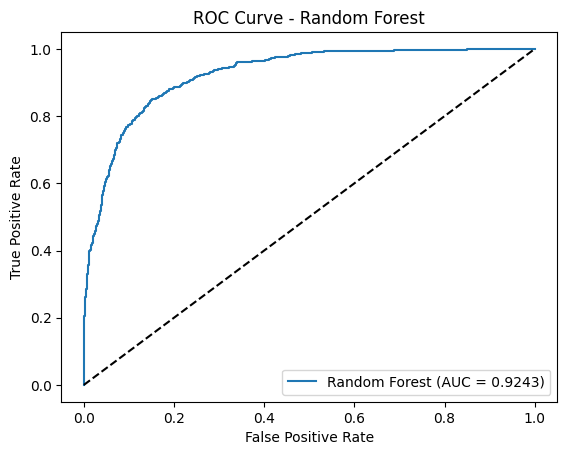

Training Support Vector Machine...
Support Vector Machine Cross-Validation Accuracy: 0.8941 ± 0.0032
Support Vector Machine Performance:
Accuracy: 0.8878
Precision: 0.7222
Recall: 0.4522
F1-score: 0.5561
ROC-AUC: 0.8561
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      3124
        True       0.72      0.45      0.56       575

    accuracy                           0.89      3699
   macro avg       0.81      0.71      0.75      3699
weighted avg       0.88      0.89      0.88      3699



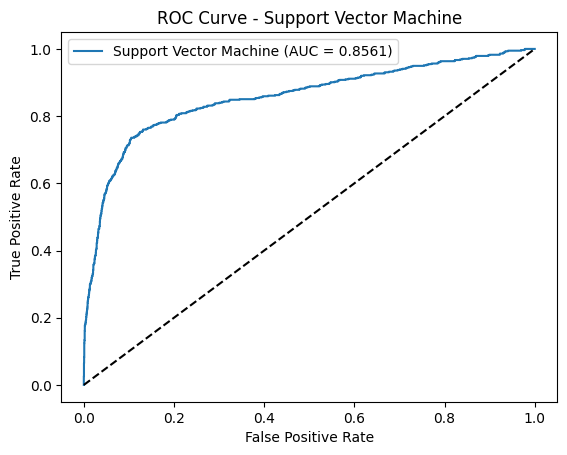

Best Model: Random Forest


In [ ]:
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Cross-validation
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring='accuracy')
    print(f'{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

    # Make predictions
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f'{model_name} Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print(f'ROC-AUC: {auc:.4f}')
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()

# Select the best model based on ROC-AUC
best_model_name = max(best_models, key=lambda model: roc_auc_score(y_test, best_models[model].predict_proba(X_test)[:, 1]))
best_model = best_models[best_model_name]
print(f'Best Model: {best_model_name}')


# Logistic Regression Outputs

Cross validation accuracy is high with 0.88 score, this model performs consistently across different subsets.

Predicting Revenue is also relatively with 0.76 high but the recall for "true" is low with 0.35 score. This indicate that this model is likely to create false negatives


F-1 score for true is 0.48 shows the improvements can be made to decrease false negatives.


Lastly the ROC and AUC curves of the model has a large area under the curve with 0.85. As we mentioned in the class as the area under the curve gets closer to 1, that model performs well.

Overall the logistic regression model shows a good performing results. Only the recall rate is relatively low so there is a room for improvement on that one.

# Decision Tree

Cross validation accuracy is high with 0.8446 score.

Predicting the revenue score is 0.617 is lower than the logistic regression model but the recall for true significantly higher than the logistic regression model with 0.5635 rate.

F1 score is 0.5891, this shows a balance between precision and recall but there is still room to improve.


ROC-AUC curve covers an area of 0.8356 which is pretty good but lower than logistic regression.

Overall results: Decision Tree model is a balanced model between detecting revenue sessions and avoiding false positives.

This model can be used in areas where cathing many positive cases is more critical than the overall error rate.


# Random Forest
Cross-validation score is the highest amongst all with a 0.9037 points. This model is so consistent.

Precision for true rates are also significantly high with 0.7209. this model does a good job predicting the true but lowe than logistic regression. Also it is not as successfull as other for recalling the true its score is 0.5165.

F1 score for true is close to the decision tree with 0.6018 performance but still it can be imroved.

ROC and AUC area covered curves are the highest in this model with 0.9243.


Overall results: random forest performed better than the other models. This model can be used practical deployment. Balance between precision and recall suggests there is still room to improve the model.


# Support Vector Machine

Cross validation Accuracy is 0.8941 which is the 2nd highest amongst the models.

Precision for true is 0.722 is a pretty good result

Recall for true performs poorly with a 0.4522

F1 score for true is 0.5561 balanced between precision and recall. It is like other 2 models there are some place to develop model.

ROC - AUC curves cover an area of 0.8561 which is pretty good. It is an indication of strong capability to distinguish between the classes .

Overall results: this is a medium performing model. SVM model can be use in areas where precision can be used when compansating for its recall with other models.


**The algorithm detected that the best model is random forest**


In [ ]:
if dfshop['Month'].isnull().any():
    print("Conversion failed for some entries in 'Month'.")


In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))
print(X.describe())

       Administrative  Administrative_Duration  Informational  \
count    1.233000e+04             1.233000e+04   1.233000e+04   
mean    -2.996612e-17             6.281359e-17  -4.610172e-18   
std      1.000041e+00             1.000041e+00   1.000041e+00   
min     -6.969930e-01            -4.571914e-01  -3.964779e-01   
25%     -6.969930e-01            -4.571914e-01  -3.964779e-01   
50%     -3.959377e-01            -4.147639e-01  -3.964779e-01   
75%      5.072280e-01             7.035981e-02  -3.964779e-01   
max      7.431499e+00             1.876956e+01   1.849960e+01   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            1.233000e+04    1.233000e+04             1.233000e+04   
mean            -2.535595e-17    4.610172e-17            -8.298309e-17   
std              1.000041e+00    1.000041e+00             1.000041e+00   
min             -2.449305e-01   -7.134884e-01            -6.243475e-01   
25%             -2.449305e-01   -5.560920e-0

Note: The code below keep giving me an error about months, it said that there is one or more data left as 'DEC' I controlled the data many times and wrote some code above to check whether there has left any data like that or not. I couldn't see any likewise the check-code approved that. to solve this persistent problem I re-write the some parts of the code to here once more.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


# Convert 'Month' to numeric values explicitly
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
dfshop['Month'] = dfshop['Month'].replace(month_mapping)

# Verify if the conversion was successful
print(dfshop['Month'].unique())  # This should show only numeric values

# Convert any other categorical text data
label_encoders = {}
for column in dfshop.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dfshop[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the label encoder if needed later

# Check for any remaining object types
print(dfshop.dtypes)  # Ensure there are no 'object' types left

# Split the data into training and testing sets
X = dfshop.drop('Revenue', axis=1)
y = dfshop['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model and parameter grid
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the results
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

[ 2  3  5 10  6  7  8 11  9 12]
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                       bool
dtype: object
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.9049950315384919
